In [1]:
import pandas as pd
import vectorbt as vbt
import quantstats as qs
from matplotlib import pyplot as plt

In [16]:
df = pd.read_table(rf'.\ZTXA.txt',encoding = 'ANSI')
df

,期貨名稱,簡稱,期貨名稱.1,日期,到期月,開盤價,最高價,最低價,收盤價,每日結算價,無風險利率,未平倉合約數,剩餘天數
0,ZTXA,台指近月期貨指數,ZTXA 台指近月期貨指數,20100104,201001,8203.0,8211.0,8101.0,8166.0,8167.0,-,50760,-
1,ZTXA,台指近月期貨指數,ZTXA 台指近月期貨指數,20100105,201001,8212.0,8260.0,8125.0,8178.0,8178.0,-,51769,-
2,ZTXA,台指近月期貨指數,ZTXA 台指近月期貨指數,20100106,201001,8197.0,8336.0,8179.0,8320.0,8321.0,-,54934,-
3,ZTXA,台指近月期貨指數,ZTXA 台指近月期貨指數,20100107,201001,8335.0,8355.0,8230.0,8259.0,8260.0,-,54734,-
4,ZTXA,台指近月期貨指數,ZTXA 台指近月期貨指數,20100108,201001,8287.0,8297.0,8183.0,8278.0,8277.0,-,55794,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,ZTXA,台指近月期貨指數,ZTXA 台指近月期貨指數,20231208,202312,17409.0,17470.0,17363.0,17377.0,17375.0,-,87293,-
3424,ZTXA,台指近月期貨指數,ZTXA 台指近月期貨指數,20231211,202312,17436.0,17457.0,17350.0,17418.0,17418.0,-,88001,-
3425,ZTXA,台指近月期貨指數,ZTXA 台指近月期貨指數,20231212,202312,17518.0,17545.0,17427.0,17464.0,17462.0,-,87797,-
3426,ZTXA,台指近月期貨指數,ZTXA 台指近月期貨指數,20231213,202312,17491.0,17519.0,17426.0,17453.0,17457.0,-,86680,-


In [19]:
df = df[["日期","到期月","開盤價","最高價","最低價","收盤價","每日結算價","未平倉合約數"]]

In [21]:
df["日期"] = pd.to_datetime(df["日期"], format="%Y%m%d")
df["到期月"] = pd.to_datetime(df["到期月"], format="%Y%m") + pd.offsets.MonthEnd(0)
df["剩餘天數"] = df["到期月"] - df["日期"] 

C:\Users\Austin\AppData\Local\Temp\ipykernel_6116\1857728425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["日期"] = pd.to_datetime(df["日期"], format="%Y%m%d")
C:\Users\Austin\AppData\Local\Temp\ipykernel_6116\1857728425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["到期月"] = pd.to_datetime(df["到期月"], format="%Y%m") + pd.offsets.MonthEnd(0)
C:\Users\Austin\AppData\Local\Temp\ipykernel_6116\1857728425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [22]:
df

,日期,到期月,開盤價,最高價,最低價,收盤價,每日結算價,未平倉合約數,剩餘天數
0,2010-01-04,2010-01-31,8203.0,8211.0,8101.0,8166.0,8167.0,50760,27 days
1,2010-01-05,2010-01-31,8212.0,8260.0,8125.0,8178.0,8178.0,51769,26 days
2,2010-01-06,2010-01-31,8197.0,8336.0,8179.0,8320.0,8321.0,54934,25 days
3,2010-01-07,2010-01-31,8335.0,8355.0,8230.0,8259.0,8260.0,54734,24 days
4,2010-01-08,2010-01-31,8287.0,8297.0,8183.0,8278.0,8277.0,55794,23 days
...,...,...,...,...,...,...,...,...,...
3423,2023-12-08,2023-12-31,17409.0,17470.0,17363.0,17377.0,17375.0,87293,23 days
3424,2023-12-11,2023-12-31,17436.0,17457.0,17350.0,17418.0,17418.0,88001,20 days
3425,2023-12-12,2023-12-31,17518.0,17545.0,17427.0,17464.0,17462.0,87797,19 days
3426,2023-12-13,2023-12-31,17491.0,17519.0,17426.0,17453.0,17457.0,86680,18 days


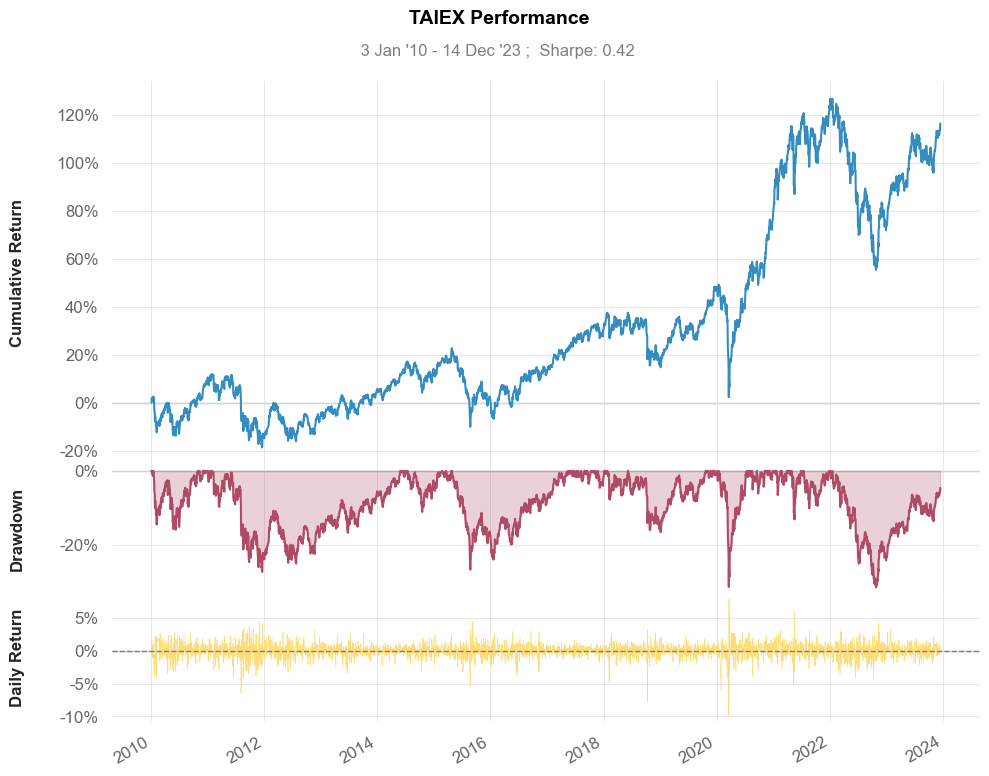

In [48]:
tmp_df = df[["日期","收盤價"]]
tmp_df = tmp_df.set_index("日期")
tmp_df

qs.plots.snapshot( tmp_df["收盤價"], title='TAIEX Performance', show=True )

c:\Users\Austin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Austin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Austin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the 

                           Strategy
-------------------------  ----------
Start Period               2010-01-04
End Period                 2023-12-14
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          116.34%
CAGR﹪                     3.89%

Sharpe                     0.42
Prob. Sharpe Ratio         93.84%
Smart Sharpe               0.41
Sortino                    0.58
Smart Sortino              0.57
Sortino/√2                 0.41
Smart Sortino/√2           0.4
Omega                      1.08

Max Drawdown               -31.51%
Longest DD Days            1215
Volatility (ann.)          16.86%
Calmar                     0.12
Skew                       -0.55
Kurtosis                   6.57

Expected Daily %           0.02%
Expected Monthly %         0.46%
Expected Yearly %          5.67%
Kelly Criterion            3.93%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.72%
Expected Shortfall (cVaR)  -1.72%

Max Consecutive Wins     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-05,2022-10-25,2023-12-14,709,-31.507885,-30.427738
2,2020-01-15,2020-03-19,2020-07-10,178,-31.425991,-26.007717
3,2011-02-08,2011-12-19,2014-06-06,1215,-27.369227,-24.786605
4,2015-04-28,2015-08-24,2017-05-12,746,-26.739196,-23.345643
5,2018-06-08,2019-01-04,2019-10-21,501,-16.567204,-15.623052


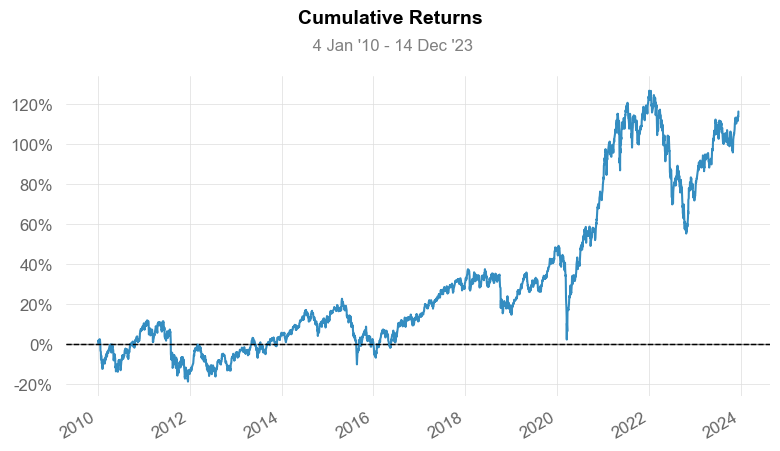

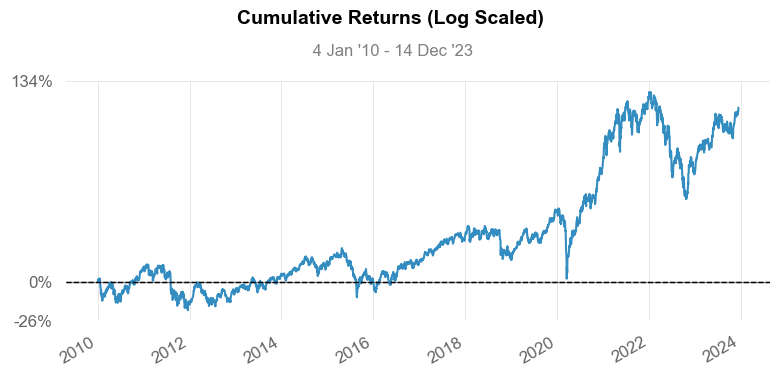

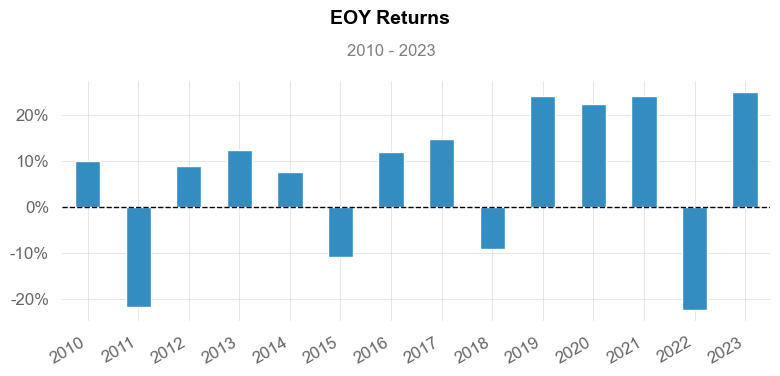

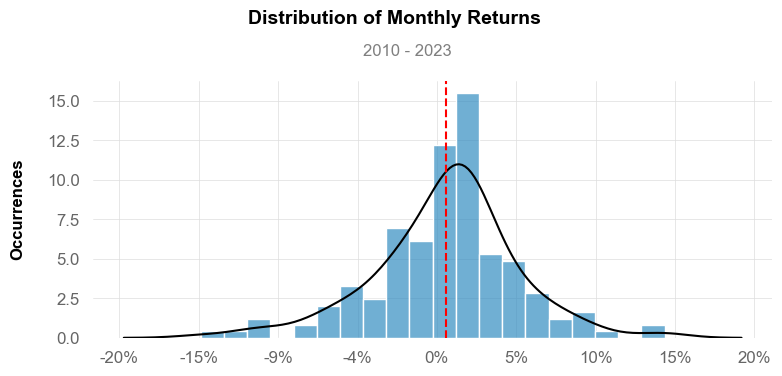

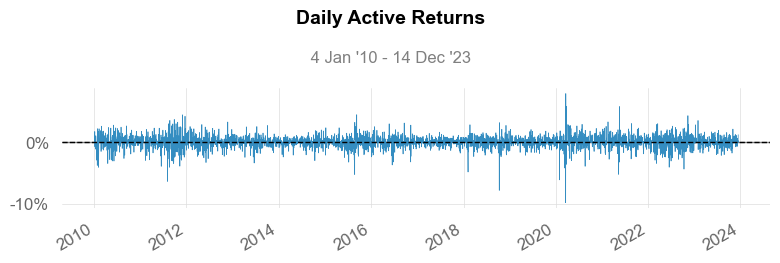

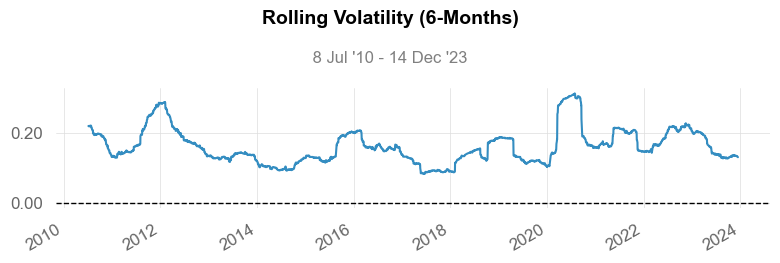

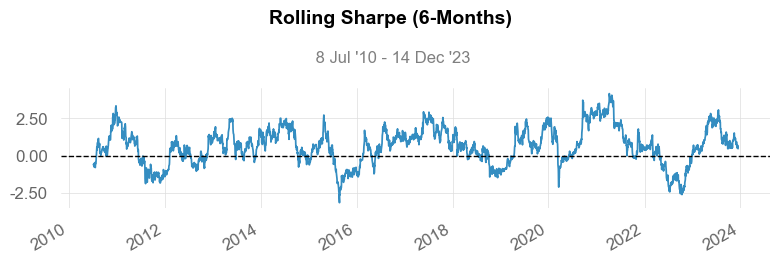

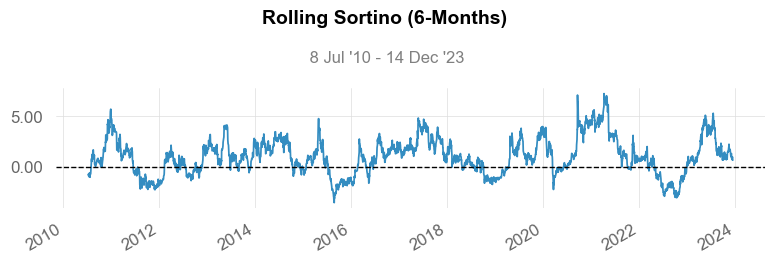

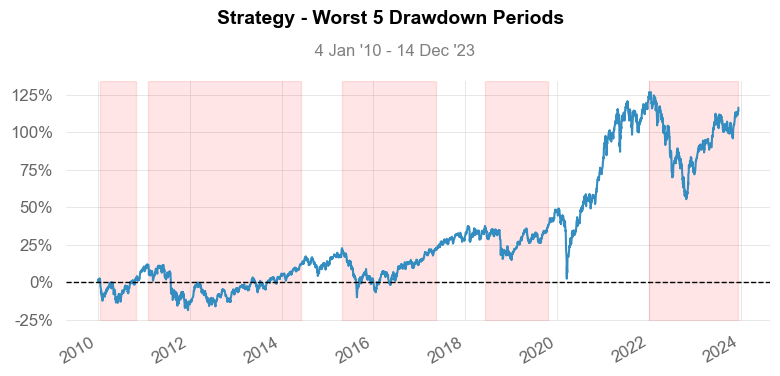

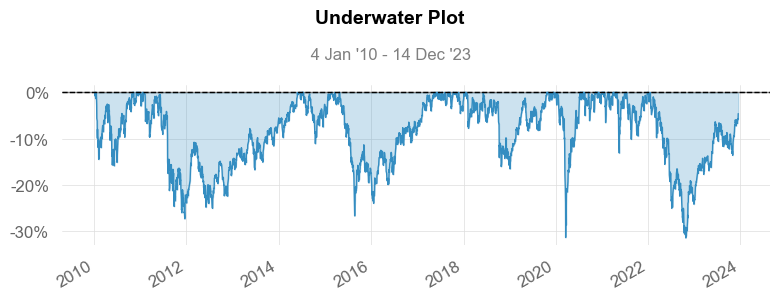

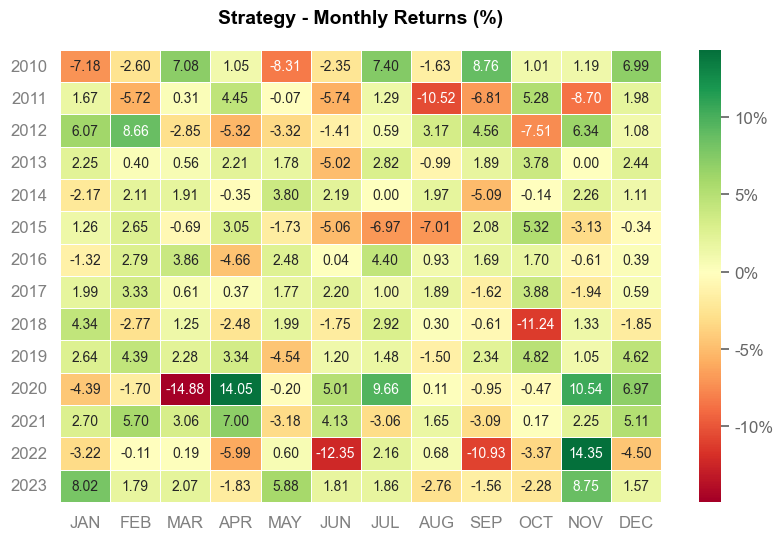

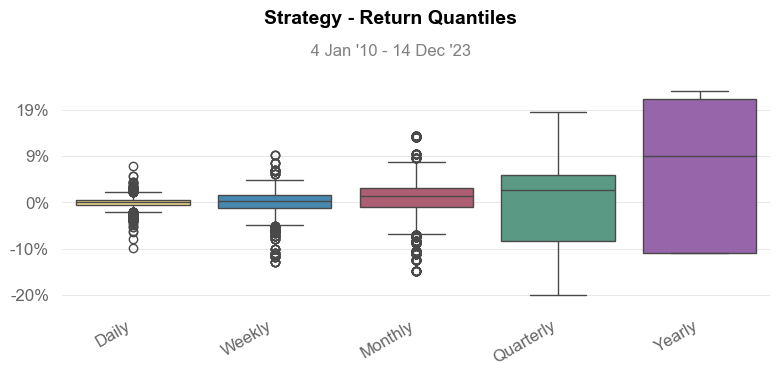

In [49]:
qs.reports.full( tmp_df["收盤價"] )